[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nsydn/ise043_tsaf/blob/2526f/ise043_tsaf_2425f_1_intro2tseries.ipynb)

# Introduction to time series analysis

## Introduction

In this lecture we will cover the following topics:

- Definition of time series data.
- Introduction to time series analysis and application examples.
- The main components of a time series.
- Time series decomposition.

In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
np.random.seed(0)  # for reproducibility

In [3]:
def ts_plot(x,y,title,xlabel="Time",ylabel="Value"):
    plt.figure(figsize=(10,5))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

## Basics

### What is a time series?

- A time series is a sequence of data points organized in time order.
- Usually, the time signal is sampled at equally spaced points in time.
- These can be represented as the sequence of the sampled values.

<img src="https://github.com/FilippoMB/python-time-series-handbook/blob/main/notebooks/01/media/ts_equal.png?raw=1" style="width: 60%; display: block; margin: auto;">

- Irregularly sampled time signals can still be represented as a time series.
- It is necessary to encode this additional information into an additional data structure.

<img src="https://github.com/FilippoMB/python-time-series-handbook/blob/main/notebooks/01/media/ts_unequal.png?raw=1" style="width: 60%; display: block; margin: auto;">

### What data are represented as time series?

- Time series are found in natural phenomena, industrial and engineering applications, business, human activities, and so on.

<img src="media/passengers.png" style="width: 70%; display: block; margin: auto;">

<img src="media/co2.png" style="width: 70%; display: block; margin: auto;">

<img src="https://github.com/FilippoMB/python-time-series-handbook/blob/main/notebooks/01/media/sunspots.png?raw=1" style="width: 70%; display: block; margin: auto;">

<img src="https://github.com/FilippoMB/python-time-series-handbook/blob/main/notebooks/01/media/electricity.png?raw=1" style="width: 70%; display: block; margin: auto;">

<img src="https://github.com/FilippoMB/python-time-series-handbook/blob/main/notebooks/01/media/water_temps.png?raw=1" style="width: 70%; display: block; margin: auto;">

- Other examples include data from:
    - Finance: stock prices, asset prices, macroeconomic factors.
    - E-Commerce: page views, new users, searches.
    - Business: transactions, revenue, inventory levels.
    - Natural language: machine translation, chatbots.

### Time series analysis

The main pruposes of time series analysis are:
1. To **understand** and **characterize** the underlying process that generates the observed data.
2. To **forecast** the evolution of the process, i.e., predict the next observed values.

- There are two main different perspectives to look at a time series.
- Each perspective leads to different time series analysis approaches

#### Probabilistic perspective

- A time series is a sequence of *random variables* that have some correlation or other distributional relationship between them.
- The sequence is a realization (observed values) of a random process.
- This approach focuses on finding the parameters of the stochastic process that most likely produced the observed time series (*parameter estimation*).

<img src="https://github.com/FilippoMB/python-time-series-handbook/blob/main/notebooks/01/media/random_var.png?raw=1" style="width: 40%; display: block; margin: auto;">

#### Dynamical system perspective

- This perspective assumes that there is a system governed by unknown variables $\{x_1, x_2, x_3, \dots ,x_𝑁\}$.
- Generally, we only observe one time series $y$ generated by the system.
- What can $y$ be?
    - One of the system variables.
    - A function $f$ of system variables.
- The objective of the analysis is to reconstruct the dynamics of the entire system from $y$.

<img src="https://github.com/FilippoMB/python-time-series-handbook/blob/main/notebooks/01/media/partial.png?raw=1" style="width: 40%; display: block; margin: auto;">

### Applications

Time series analysis is applied in many real world applications, including (but not limited to)
- Economic forecasting
- Stock market analysis
- Demand forecasting
- Anomaly detection
- Disease prediction

**Economic Forecasting**

- Time series analysis is used in macroeconomic predictions.
- World Trade Organization does time series forecasting to predict levels of international trade [[source](https://www.econ-jobs.com/research/36056-Forecasting-international-trade-A-time-series-approach.pdf)].
- Federal Reserve uses time series forecasts of the economy to set interest rates [[source](https://www.federalreserve.gov/pubs/feds/2009/200910/200910pap.pdf)].

<img src="https://github.com/FilippoMB/python-time-series-handbook/blob/main/notebooks/01/media/economic.png?raw=1" style="width: 40%; display: block; margin: auto;">

**Demand forecasting**

- Time series analysis is used to predict demand for a product, service, electricity, etc.
- Amazon and other e-commerce companies use time series modeling to predict demand at a product geography level [[source](https://www.theverge.com/2014/1/18/5320636/amazon-plans-to-ship-your-packages-before-you-even-buy-them)].
- Helps meet customer needs (fast shipping) and reduce inventory waste.

<img src="https://github.com/FilippoMB/python-time-series-handbook/blob/main/notebooks/01/media/ecommerce.png?raw=1" style="width: 40%; display: block; margin: auto;">

**Anomaly detection**

- Used to detect anomalous behaviors in the underlying system by looking at unusual patterns in the time series.
- Widely used in manufacturing to detect defects and target preventive maintenance [[source](https://papers.phmsociety.org/index.php/phme/article/view/1256/phmec_20_1256)].
- With new IoT devices, anomaly detection is being used in heavy industries, such as petroleum and gas [[source](https://arxiv.org/abs/1607.02480)].

<img src="https://github.com/FilippoMB/python-time-series-handbook/blob/main/notebooks/01/media/anomaly.png?raw=1" style="width: 40%; display: block; margin: auto;">

---

## Time series components

- A time series is often assumed to be composed of three components:
    - ***Trend***: the long-term direction.
    - ***Seasonality***: the periodic behavior.
    - ***Residuals***: the irregular fluctuations.

$$X(t)=T(t)+S(t)+\epsilon(t)$$

### Trend $T(t)$

- Trend captures the general direction of the time series.
- For example, increasing number of passengers over the years despite seasonal fluctuations.
- Trend can be increasing, decreasing, or constant.
- It can increase/decrease in different ways over time (linearly, exponentially, etc…).
    - This means trend doesn't have to be linear

<img src="https://github.com/FilippoMB/python-time-series-handbook/blob/main/notebooks/01/media/passengers_trend.png?raw=1" style="width: 80%; display: block; margin: auto;">

- Let's create a trend from scratch to understand how it looks like.

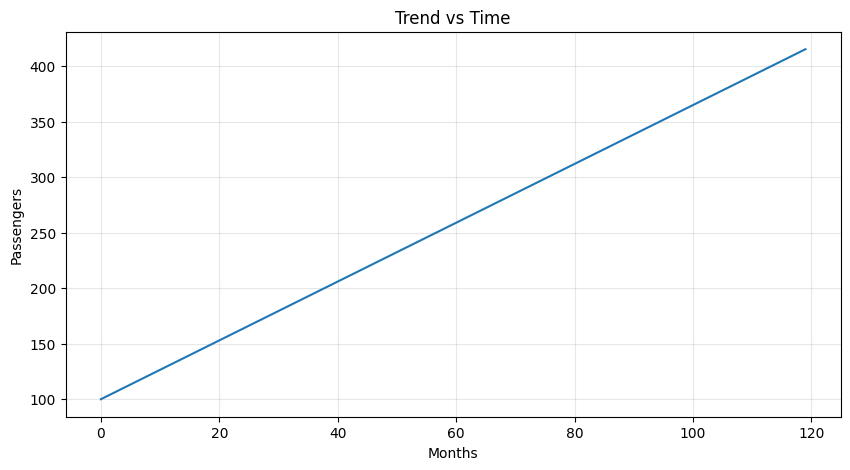

In [4]:
time = np.arange(120)
trend = 100 + 2.65 * time
ts_plot(time,trend,"Trend vs Time","Months","Passengers")

### Seasonality $S(t)$

- Periodic fluctuations in time series data that occur at regular intervals due to seasonal factors.
- It is characterized by consistent and predictable patterns over a specific period (e.g., daily, monthly, quarterly, yearly).

It can be driven by many factors.
- Naturally occurring events such as weather fluctuations caused by time of year.
- Business or administrative procedures, such as start and end of a school year.
- Social or cultural behavior, e.g., holidays or religious observances.

- Let's generate the seasonal component.

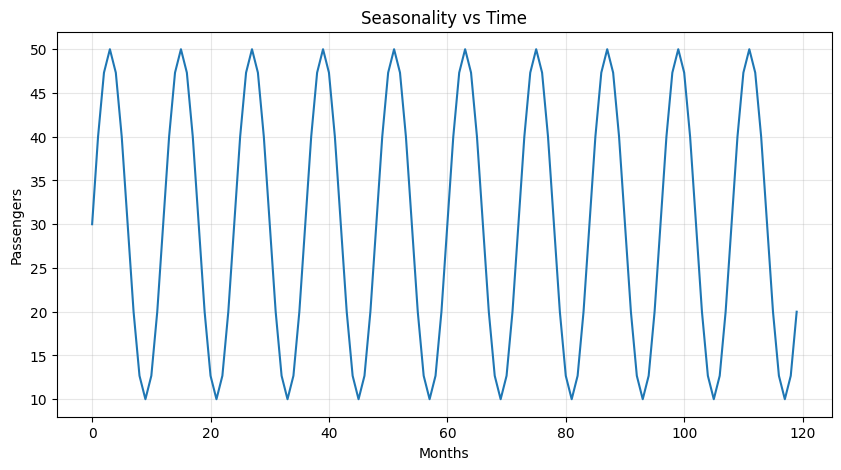

In [5]:
seasonal = 30 + 20 * np.sin(2*np.pi*(time / 12))
# seasonal = 20 * np.sin(time * np.pi/6) + np.sin(time * np.pi/12) * 10 + np.sin(time * np.pi/30) * 30
# seasonal = 20 + 20 * np.sin(time * 0.5)
ts_plot(time,seasonal,"Seasonality vs Time","Months","Passengers")

### Residuals $\epsilon(t)$

- Residuals are the random fluctuations left over after trend and seasonality are removed from the original time series.
- One should not see a trend or seasonal pattern in the residuals.
- They represent short-term, rather unpredictable fluctuations.

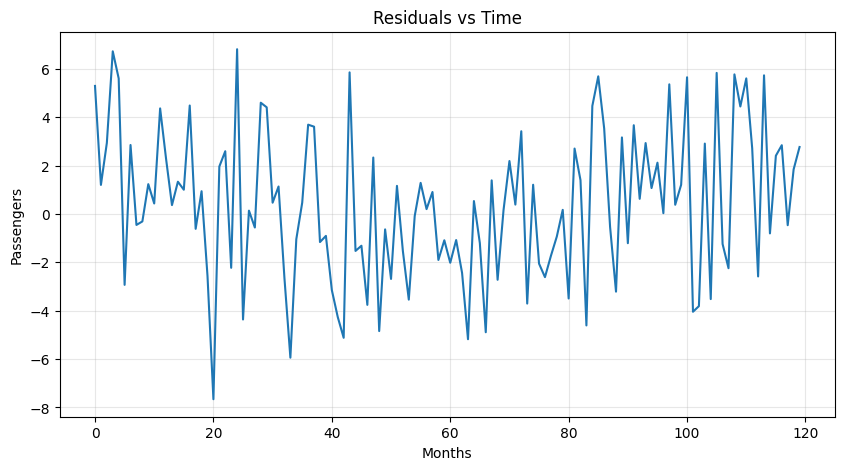

In [6]:
np.random.seed(0)
residuals = np.random.normal(loc=0.0, scale=3, size=len(time))
ts_plot(time,residuals,"Residuals vs Time","Months","Passengers")

In [7]:
from scipy import stats
res = stats.normaltest(residuals)
res.statistic, res.pvalue

(np.float64(2.9847248659200054), np.float64(0.22484085616722652))

---

## Decomposition Models

- Time series components can be decomposed with the following models:
    1. Additive decomposition
    2. Multiplicative decomposition
    3. Pseudoadditive decomposition

### Additive model

- Additive models assume that the observed time series is the sum of its components:

$$X(t) = T(t) + S(t) + \epsilon(t)$$  

- where
    - $X(t)$ is the time series   
    - $T(t)$ is the trend  
    - $S(t)$ is the seasonality  
    - $\epsilon(t)$ is the residual  
- Additive models are used when the magnitudes of the seasonal and residual values do not depend on the level of the trend.

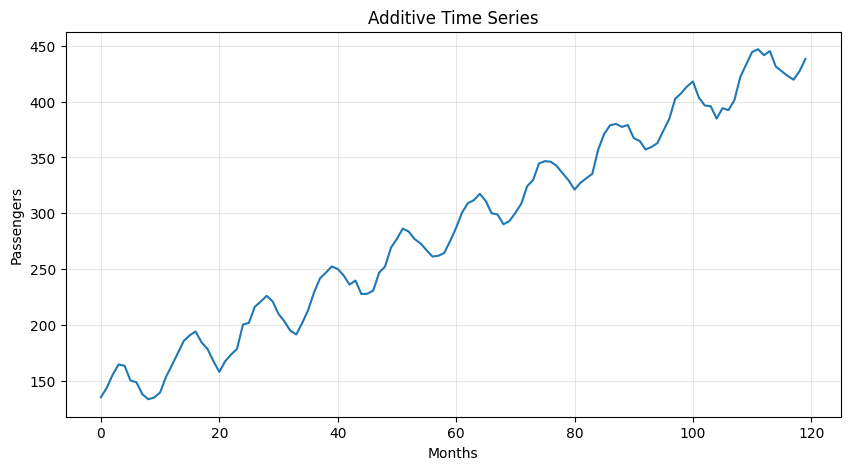

In [8]:
additive = trend + seasonal + residuals
ts_plot(time,additive,"Additive Time Series","Months","Passengers")

### Multiplicative Model

- Assumes that the observed time series is the product of its components:

$$X(t) = T(t) \cdot S(t) \cdot \epsilon(t)$$

- It is possible to transform a multiplicative model to an additive one by applying a log transformation:

$$\log(X_t) = \log \left( T(t) \cdot S(t) \cdot \epsilon(t) \right) = \log(T(t)) + \log(S(t)) + \log(\epsilon(t))$$

- Multiplicative models are used when the magnitudes of seasonal and residual values depends on trend.

In [9]:
multiplicative = trend * seasonal  # we do not include the residuals to make the pattern more clear

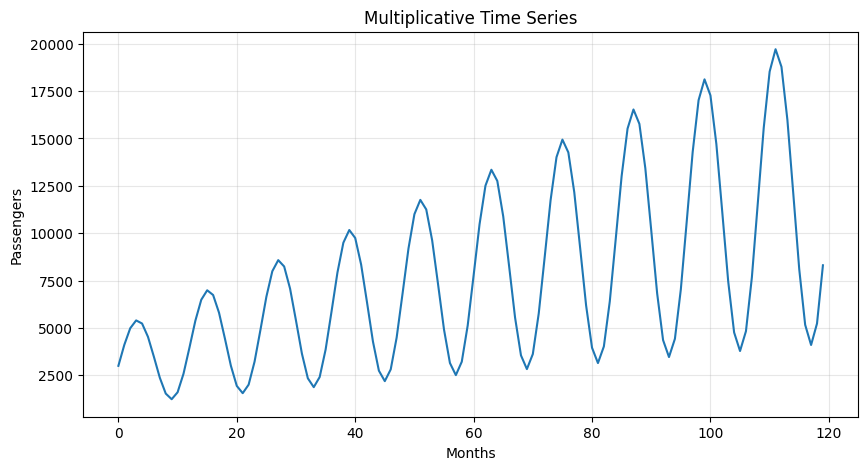

In [10]:
ts_plot(time,multiplicative,"Multiplicative Time Series","Months","Passengers")

### Pseudoadditive Model

- In real world, the seasonality neither stays constant (like **additive**) nor scales perfectly proportionally (like **multiplicative**).
- **Pseudoadditive models** combine elements of the **additive** and **multiplicative** models.
- Useful when:
    - Time series values are close to or equal to zero. Multiplicative models struggle with zero values, but you still need to model multiplicative seasonality.
    - Some features are multiplicative (e.g., seasonal effects) and other are additive (e.g., residuals).
    - Complex seasonal patterns or data that do not completely align with additive or multiplicative model.

- For example, this model is particularly relevant for modeling series that:
    - are extremely weather-dependent,
    - have sharply pronounced seasonal fluctuations and trend-cycle movements.
- Formulation:

$$X_t = T_t + T_t\cdot(S_t - 1) + T_t\cdot(\epsilon_t - 1) = T_t\cdot(S_t + \epsilon_t -1)$$

$$X_t = T_t\cdot(S_t + \epsilon_t -1)$$

In [11]:
pseudoadditive = trend * (seasonal + residuals - 1)

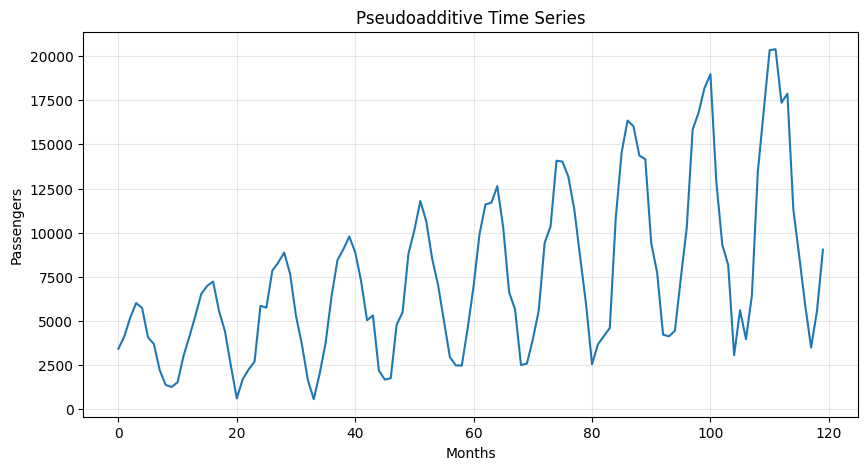

In [12]:
ts_plot(time,pseudoadditive,"Pseudoadditive Time Series","Months","Passengers")

---

## Time Series Decomposition

- Now let's reverse directions.
- We have additive and multiplicative data.
- Let's decompose them into their three components.

- A very simple, yet often useful, approach is to estimate a *linear* trend.
- A *detrended* time series is obtained by subtracting the linear trend from the data.
- The linear trend is computed as a 1st order polynomial.

### De-trending

Additive: $X(t) - T(t) = S(t) + \epsilon(t)$

Multplicative: $X(t) / T(t) = S(t) \cdot \epsilon(t)$

**Using `polyfit`**

In [13]:
slope, intercept = np.polyfit(np.arange(len(additive)), additive, 1) # estimate line coefficient
print('intercept: %.2f, slope: %.2f' % (intercept,slope))
trend = np.arange(len(additive)) * slope + intercept # linear trend
detrended = additive - trend # remove the trend

intercept: 131.99, slope: 2.62


**Using `statsmodels`**

In [14]:
import statsmodels.api as sm
sm.OLS(additive,sm.add_constant(np.arange(len(additive)))).fit(fit_intercept=True).params

array([131.98839216,   2.62326795])

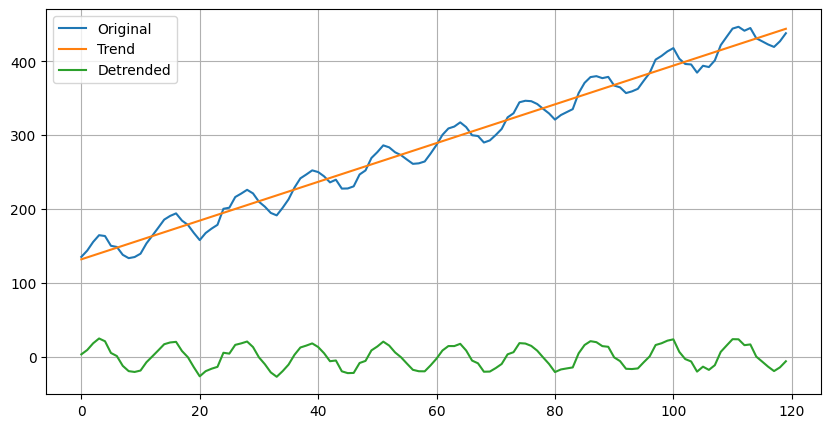

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(additive, label='Original')
plt.plot(trend, label='Trend')
plt.plot(detrended, label='Detrended')
plt.grid()
plt.legend();

- Next, we will use `seasonal_decompose` (more information [here](http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)) to isolate the main time series components.
- This is a simple method that requires us to specify the type of model (additive or multiplicative) and the main period.

### Additive Decomposition (using `seasonal_decompose`)

- We need to specify an integer that represents the main seasonality of the data.
- By looking at the seasonal component, we see that each cycle contains *approximately* $12$ time steps.
    - If multiple cycle types are visible, then choose the largest period.
- So, we set `period=12`.

In [16]:
additive_decompose = seasonal_decompose(x=additive, model='additive', period=12, extrapolate_trend=1)

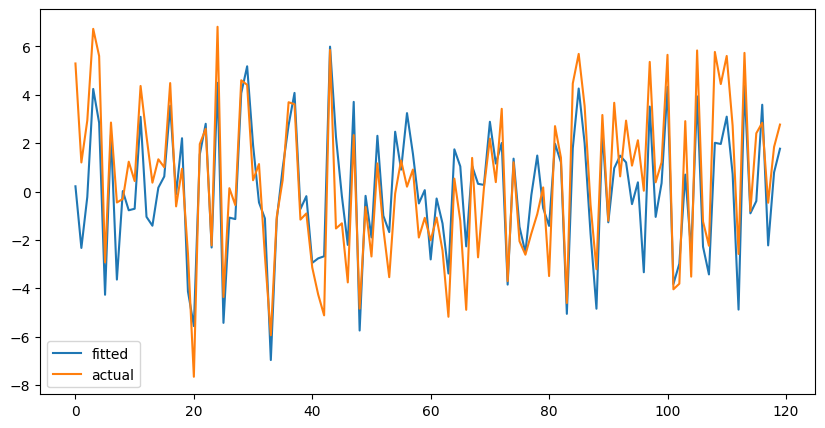

In [17]:
plt.figure(figsize=(10, 5))
# plt.plot(additive_decompose.trend,label='fitted')
# plt.plot(trend,label='actual')
# plt.plot(additive_decompose.seasonal,label='fitted')
# plt.plot(seasonal,label='actual')
plt.plot(additive_decompose.resid,label='fitted')
plt.plot(residuals,label='actual')
plt.legend();

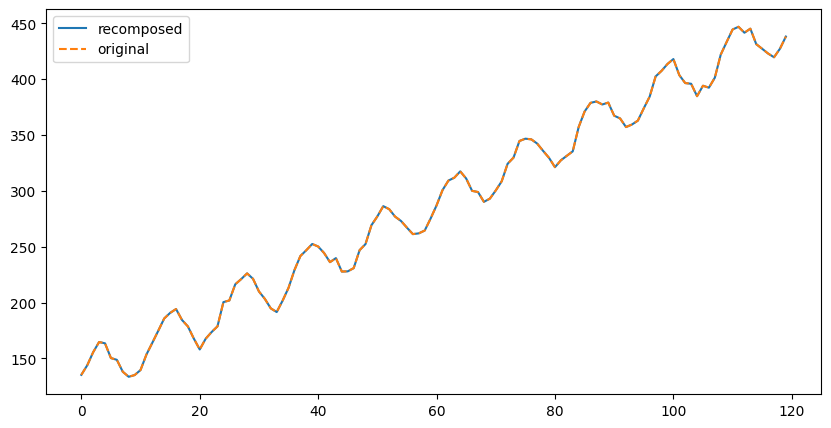

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(additive_decompose.trend+additive_decompose.seasonal+additive_decompose.resid, label='recomposed')
plt.plot(additive,'--', label='original')
plt.legend();

In [19]:
from scipy import stats
test = stats.normaltest(additive_decompose.resid[~np.isnan(additive_decompose.resid)])
print('test statistic: %.2f, p-value: %.2f' % (test.statistic, test.pvalue))

test statistic: 1.93, p-value: 0.38


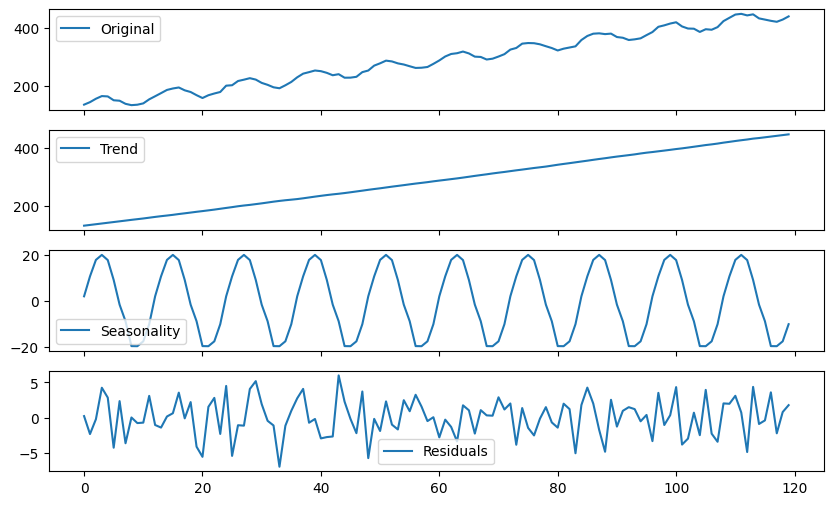

CPU times: total: 281 ms
Wall time: 288 ms


In [20]:
%%time
additive_decompose = seasonal_decompose(x=additive, model='additive', period=12, extrapolate_trend=1)
fig,ax = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(10, 6))
ax[0].plot(additive, label='Original'); ax[0].legend()
ax[1].plot(additive_decompose.trend, label='Trend'); ax[1].legend()
ax[2].plot(additive_decompose.seasonal, label='Seasonality'); ax[2].legend()
ax[3].plot(additive_decompose.resid, label='Residuals'); ax[3].legend()
plt.show()

In [21]:
from scipy import stats
res = stats.normaltest(additive_decompose.resid)
res.statistic, res.pvalue

(np.float64(1.932323869465796), np.float64(0.3805407792085759))

- The blue line in each plot representes the decomposition.
- There is a legend in the upper left corner of each plot to let you know what each plot represents.
- You can see the decomposition is not perfect with regards to seasonality and residuals, but it's pretty close.

- You may notice both *trend* and *residuals* are missing data towards the beginning and end.
- This has to do with how `seasonal_decompose` calculates the trend (beyond the scope of this lesson).
- In other words, there is nothing wrong with these graphs.

### Multiplicative Decomposition (using `seasonal_decompose`)

- We use the same function as before, but on the `multiplicative` time series.
- Since we know this is a multiplicative time series, we declare `model='multiplicative'` in `seasonal_decompose`.

In [22]:
multiplicative_decompose = seasonal_decompose(x=multiplicative, model='multiplicative', period=12)
# seas_decomp_plots(multiplicative, multiplicative_decompose)

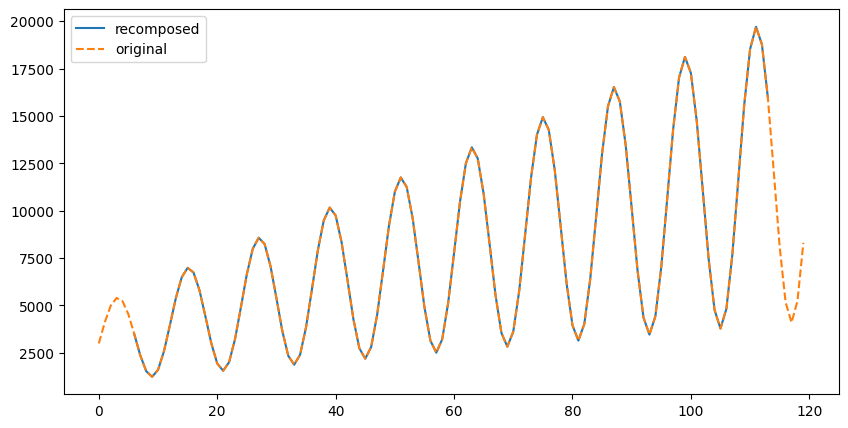

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(multiplicative_decompose.trend * multiplicative_decompose.seasonal * multiplicative_decompose.resid, label='recomposed')
plt.plot(multiplicative,'--', label='original')
plt.legend();

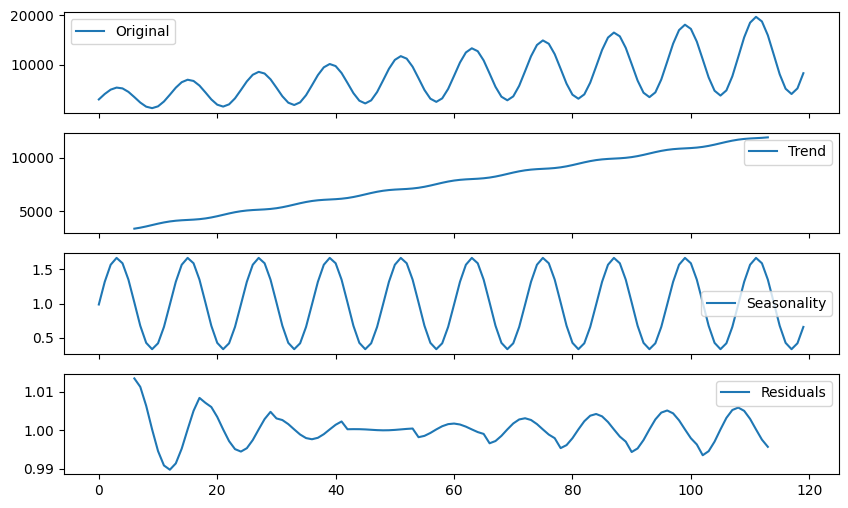

In [32]:
fig,ax = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(10, 6))
ax[0].plot(multiplicative, label='Original'); ax[0].legend()
ax[1].plot(multiplicative_decompose.trend, label='Trend'); ax[1].legend()
ax[2].plot(multiplicative_decompose.seasonal, label='Seasonality'); ax[2].legend()
ax[3].plot(multiplicative_decompose.resid, label='Residuals'); ax[3].legend()
plt.show()

In [24]:
log_multiplicative = np.log(multiplicative)

In [25]:
log_multiplicative_decompose = seasonal_decompose(x=log_multiplicative, model='additive', period=12)
# seas_decomp_plots(multiplicative, multiplicative_decompose)

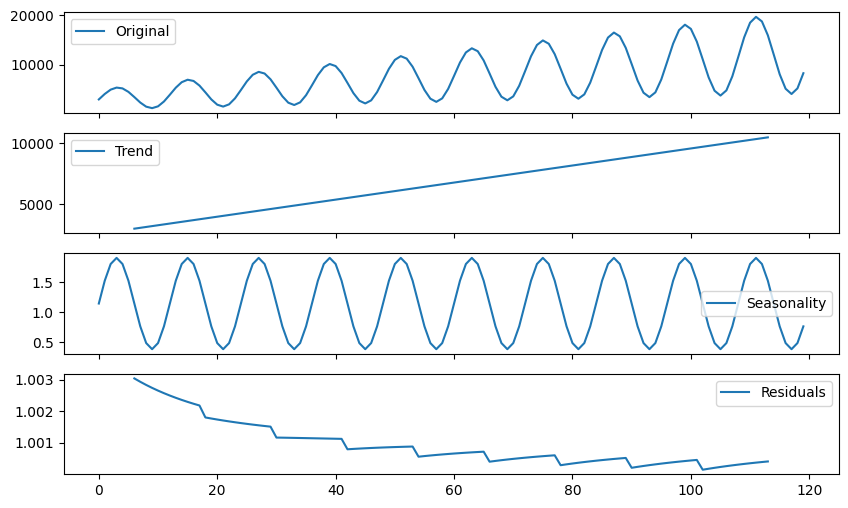

In [26]:
fig,ax = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(10, 6))
ax[0].plot(np.exp(log_multiplicative), label='Original'); ax[0].legend()
ax[1].plot(np.exp(log_multiplicative_decompose.trend), label='Trend'); ax[1].legend()
ax[2].plot(np.exp(log_multiplicative_decompose.seasonal), label='Seasonality'); ax[2].legend()
ax[3].plot(np.exp(log_multiplicative_decompose.resid), label='Residuals'); ax[3].legend()
plt.show()

- Again, the decomposition does a relatively good job picking up the overall trend and seasonality.
- We can see the shapes follow the patterns we expect.

## Summary

In this lecture we covered the following topics.
- The definition of a time series and examples of time series from the real world.
- The definition of time series analysis and examples of its application in different fields.
- A practical understanding of the three components of time series data.
- The additive, multiplicative, and pseudo-additive models.
- Standard approaches to decompose a time series in its constituent parts.

---

## Exercises

### Exercise 1

- Generate a seasonal component that includes two signals with periods $P=6,12,24$ (Hint: $2\pi*t/P$).
- Regenerate the signals `additive` and `multiplicative` using this seasonal component.
- Perform the seasonal decomposition with `seasonal_decompose` on the new signals and compare the results with the ones obtained before.

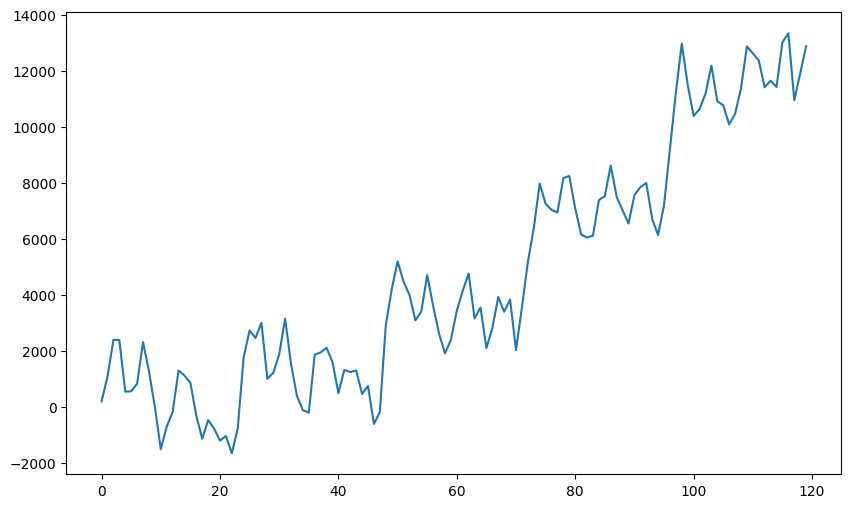

In [27]:
plt.figure(figsize=(10,6))
seasonal=(np.sin(2*np.pi*time/6) + np.sin(2*np.pi*time/12) + np.sin(2*np.pi*time/24))*1000
trend = time**2
resid = np.random.normal(loc=0.0, scale=500, size=len(time))
ex1_ts = seasonal + trend + resid
plt.plot(time, ex1_ts)
plt.show()

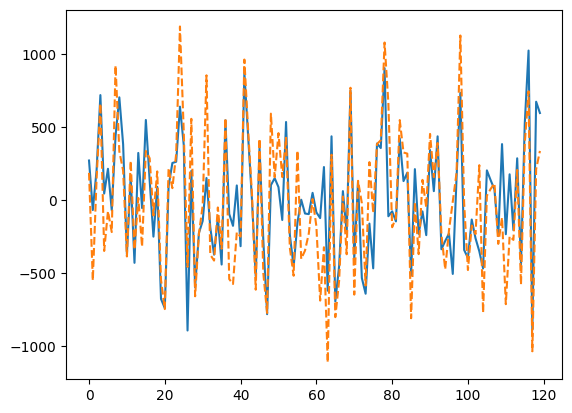

In [28]:
ex1_ts_decompose = seasonal_decompose(x=ex1_ts, model='additive', period=24, extrapolate_trend=1)
plt.plot(ex1_ts_decompose.resid)
plt.plot(resid,'--')
# plt.plot(ex1_ts)
# plt.plot(ex1_ts_decompose.seasonal)

### Exercise 2
Load the two different time series as follows.

In [29]:
ts_A = sm.datasets.get_rdataset("AirPassengers", "datasets").data["value"]
print(len(ts_A))
ts_B = sm.datasets.sunspots.load_pandas().data['SUNACTIVITY']
print(len(ts_B))

144
309


In [46]:
exercise_decompose = seasonal_decompose(x=ts_A, model='multiplicative', period=12)

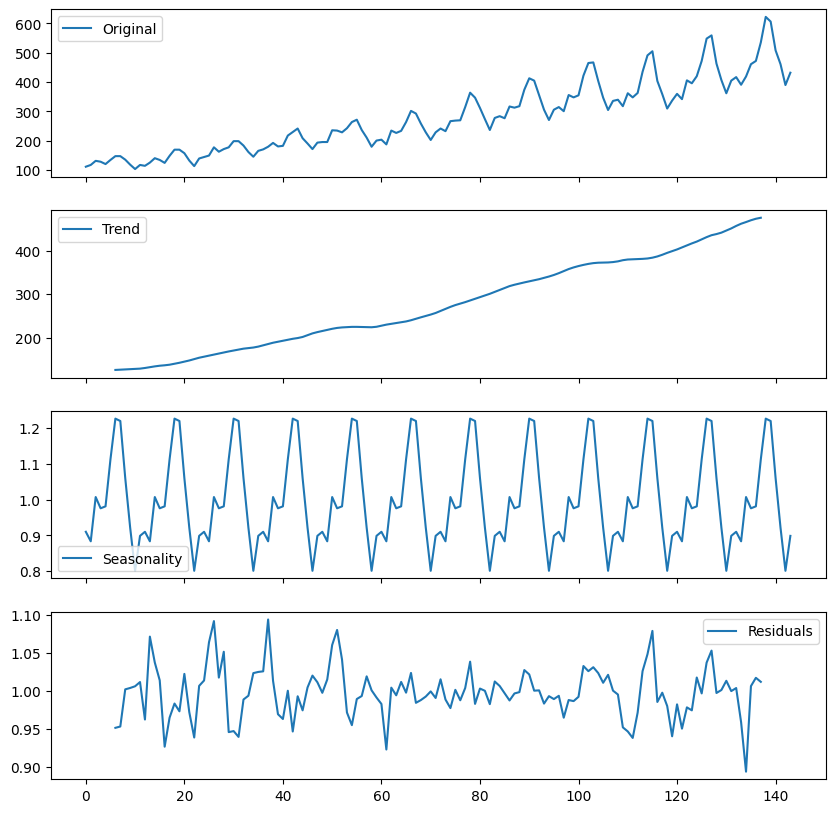

In [49]:
fig,ax = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(10, 10))
ax[0].plot(ts_A, label='Original'); ax[0].legend()
ax[1].plot(exercise_decompose.trend, label='Trend'); ax[1].legend()
ax[2].plot(exercise_decompose.seasonal, label='Seasonality'); ax[2].legend()
ax[3].plot(exercise_decompose.resid, label='Residuals'); ax[3].legend()
plt.show()

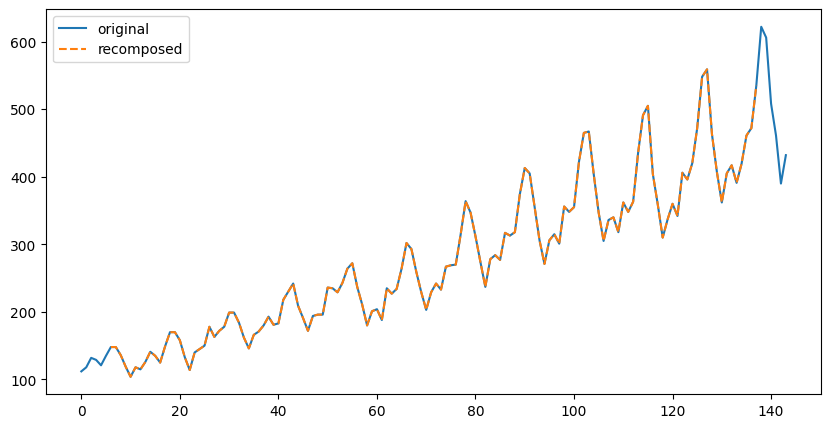

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(ts_A, label='original')
plt.plot(exercise_decompose.trend * exercise_decompose.seasonal * exercise_decompose.resid,'--', label='recomposed')
plt.legend();

- Plot the two time series.
- Determine if the time series looks additive or multiplicative models.
- Determine the main period of the seasonal component in the two time series.

### Exercise 3
- Decompose `ts_A` and `ts_B` using `seasonal_decompose`.
- Comment on the results you obtain.